# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 608


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
# Define an empty list to fetch the weather data for each city
city_name = []
city_lat = []
city_lng = []
city_max_temp = []
city_humidity = []
city_clouds = []
city_wind = []
city_country = []
city_date = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url + city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        # Append the City information into city_data list
        city_name.append(city_weather["name"])
        city_lat.append(city_weather["coord"]["lat"])
        city_lng.append(city_weather["coord"]["lon"])
        city_max_temp.append(city_weather["main"]["temp_max"])
        city_humidity.append(city_weather["main"]["humidity"])
        city_clouds.append(city_weather["clouds"]["all"])
        city_wind.append(city_weather["wind"]["speed"])
        city_country.append(city_weather["sys"]["country"])
        city_date.append(city_weather["dt"])

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kavaratti
Processing Record 2 of Set 1 | atuona
Processing Record 3 of Set 1 | georgetown
Processing Record 4 of Set 1 | hilo
Processing Record 5 of Set 1 | cabo san lucas
Processing Record 6 of Set 1 | kieta
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | putina
Processing Record 9 of Set 1 | sydney
Processing Record 10 of Set 1 | olinda
Processing Record 11 of Set 1 | jamestown
Processing Record 12 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 13 of Set 1 | hermanus
Processing Record 14 of Set 1 | port lincoln
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | thompson
Processing Record 17 of Set 1 | upernavik
Processing Record 18 of Set 1 | yumen
Processing Record 19 of Set 1 | arona
Processing Record 20 of Set 1 | tilichiki
Processing Record 21 of Set 1 | busselton
Processing Record 22 of Set 1 | ponta do sol
Processing Record

Processing Record 36 of Set 4 | munsingen
Processing Record 37 of Set 4 | neuquen
Processing Record 38 of Set 4 | bosanska kostajnica
Processing Record 39 of Set 4 | san vicente
Processing Record 40 of Set 4 | genhe
Processing Record 41 of Set 4 | jining
Processing Record 42 of Set 4 | madimba
Processing Record 43 of Set 4 | acapulco
Processing Record 44 of Set 4 | tyshkivka
Processing Record 45 of Set 4 | keti bandar
Processing Record 46 of Set 4 | marcona
City not found. Skipping...
Processing Record 47 of Set 4 | paidha
Processing Record 48 of Set 4 | guisa
Processing Record 49 of Set 4 | sao gabriel da cachoeira
Processing Record 0 of Set 5 | carmen
Processing Record 1 of Set 5 | talnakh
Processing Record 2 of Set 5 | sandpoint
Processing Record 3 of Set 5 | palauig
Processing Record 4 of Set 5 | torbay
Processing Record 5 of Set 5 | krasnoselkup
Processing Record 6 of Set 5 | avera
Processing Record 7 of Set 5 | hithadhoo
Processing Record 8 of Set 5 | camapua
Processing Record 9 

Processing Record 22 of Set 8 | salinas
Processing Record 23 of Set 8 | banff
Processing Record 24 of Set 8 | todos santos
Processing Record 25 of Set 8 | mirnyy
Processing Record 26 of Set 8 | half moon bay
Processing Record 27 of Set 8 | amapa
Processing Record 28 of Set 8 | mponela
Processing Record 29 of Set 8 | kiunga
Processing Record 30 of Set 8 | ayer tawar
Processing Record 31 of Set 8 | qui nhon
Processing Record 32 of Set 8 | fukue
Processing Record 33 of Set 8 | long
Processing Record 34 of Set 8 | yazoo city
Processing Record 35 of Set 8 | euclides da cunha
Processing Record 36 of Set 8 | olafsvik
Processing Record 37 of Set 8 | dikson
Processing Record 38 of Set 8 | dolinsk
Processing Record 39 of Set 8 | nikolskoye
Processing Record 40 of Set 8 | san juan
Processing Record 41 of Set 8 | roura
Processing Record 42 of Set 8 | shetpe
Processing Record 43 of Set 8 | sheridan
Processing Record 44 of Set 8 | vardo
Processing Record 45 of Set 8 | porto torres
Processing Record 

Processing Record 10 of Set 12 | weyburn
Processing Record 11 of Set 12 | gore
Processing Record 12 of Set 12 | raipur
Processing Record 13 of Set 12 | shakhtinsk
Processing Record 14 of Set 12 | rumonge
Processing Record 15 of Set 12 | babanusah
City not found. Skipping...
Processing Record 16 of Set 12 | carahue
Processing Record 17 of Set 12 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 18 of Set 12 | les cayes
Processing Record 19 of Set 12 | bhadasar
Processing Record 20 of Set 12 | gola bazar
Processing Record 21 of Set 12 | amurzet
Processing Record 22 of Set 12 | narsaq
Processing Record 23 of Set 12 | pirojpur
Processing Record 24 of Set 12 | kawalu
Processing Record 25 of Set 12 | camrose
Processing Record 26 of Set 12 | margherita
Processing Record 27 of Set 12 | valer
Processing Record 28 of Set 12 | bambanglipuro
Processing Record 29 of Set 12 | san jose acatempa
Processing Record 30 of Set 12 | nelson bay
Processing Record 31 of Set 12 | bam
Processin

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_dict = {
    "City": city_name,
    "Lat": city_lat,
    "Lng": city_lng,
    "Max Temp": city_max_temp,
    "Humidity": city_humidity,
    "Cloudiness": city_clouds,
    "Wind Speed": city_wind,
    "Country": city_country,
    "Date": city_date
}
city_data_df = pd.DataFrame(city_dict)

# Show Record Count
city_data_df.count()

City          551
Lat           551
Lng           551
Max Temp      551
Humidity      551
Cloudiness    551
Wind Speed    551
Country       551
Date          551
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kavaratti,10.5669,72.6420,26.91,75,88,6.33,IN,1675722450
1,Atuona,-9.8000,-139.0333,25.67,76,10,5.81,PF,1675722450
2,George Town,5.4112,100.3354,25.96,91,20,3.60,MY,1675722378
3,Hilo,19.7297,-155.0900,26.27,88,75,1.79,US,1675722451
4,Cabo San Lucas,22.8909,-109.9124,27.56,47,0,6.69,MX,1675722431


In [2]:
# Export the City_Data into a csv
city_data_df.to_csv("city_data_df.csv", index_label="City_ID")

NameError: name 'city_data_df' is not defined

In [2]:
# Read saved data

city_data_df = pd.read_csv("city_data_df.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Kavaratti,10.5669,72.6420,26.91,75,88,6.33,IN,1675722450
1,Atuona,-9.8000,-139.0333,25.67,76,10,5.81,PF,1675722450
2,George Town,5.4112,100.3354,25.96,91,20,3.60,MY,1675722378
3,Hilo,19.7297,-155.0900,26.27,88,75,1.79,US,1675722451
4,Cabo San Lucas,22.8909,-109.9124,27.56,47,0,6.69,MX,1675722431


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

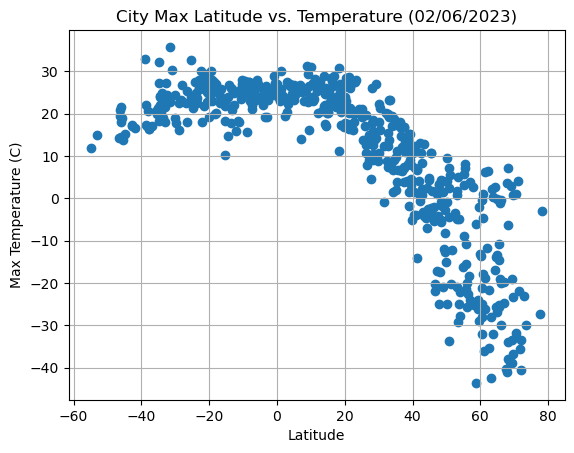

In [3]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]
plt.scatter(x_values, y_values)
# Incorporate the other graph properties
today = time.strftime("%m/%d/%Y")
plt.title(f"City Max Latitude vs. Temperature ({today})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

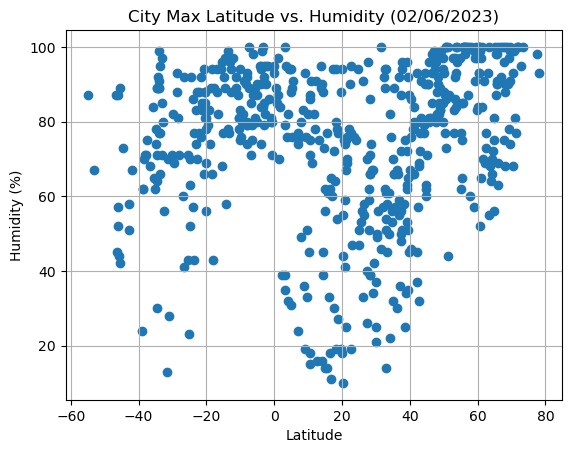

In [4]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]
plt.scatter(x_values, y_values)

# Incorporate the other graph properties
today = time.strftime("%m/%d/%Y")
plt.title(f"City Max Latitude vs. Humidity ({today})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

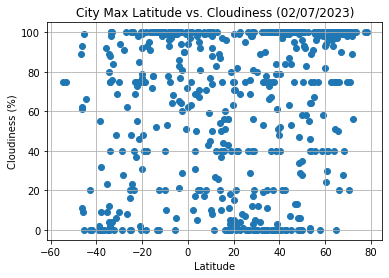

In [3]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]
plt.scatter(x_values, y_values)

# Incorporate the other graph properties
today = time.strftime("%m/%d/%Y")
plt.title(f"City Max Latitude vs. Cloudiness ({today})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

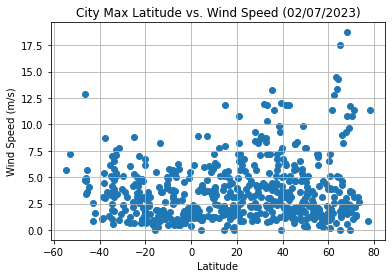

In [4]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]
plt.scatter(x_values, y_values)

# Incorporate the other graph properties
today = time.strftime("%m/%d/%Y")
plt.title(f"City Max Latitude vs. Wind Speed ({today})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [26]:
# Define a function to create Linear Regression plots
def linear_regrression(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values, y_values)
    plt.plot(x_values,regress_values,"r-")
    print(f"The r-value is: {rvalue**2}")
    plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
    return line_eq


In [7]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Kavaratti,10.5669,72.6420,26.91,75,88,6.33,IN,1675722450
2,George Town,5.4112,100.3354,25.96,91,20,3.60,MY,1675722378
3,Hilo,19.7297,-155.0900,26.27,88,75,1.79,US,1675722451
4,Cabo San Lucas,22.8909,-109.9124,27.56,47,0,6.69,MX,1675722431
10,Jamestown,42.0970,-79.2353,-0.55,93,100,3.09,US,1675722361


In [6]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,Atuona,-9.8000,-139.0333,25.67,76,10,5.81,PF,1675722450
5,Kieta,-6.2167,155.6333,26.10,87,100,2.70,PG,1675722451
6,Rikitea,-23.1203,-134.9692,26.14,74,69,4.13,PF,1675722451
7,Putina,-15.4667,-69.4333,10.30,68,78,5.45,PE,1675722452
8,Sydney,-33.8679,151.2073,24.83,77,75,3.09,AU,1675721878


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7316790992118285


Text(0, 0.5, 'Max Temp')

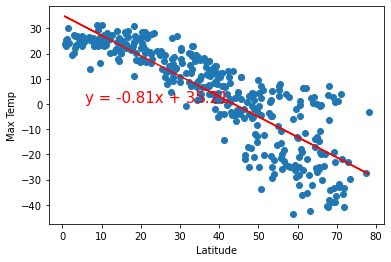

In [27]:
# Linear regression on Northern Hemisphere
n_h_t = linear_regrression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temp")


The r-value is: 0.17015349205479396


Text(0, 0.5, 'Max Temp')

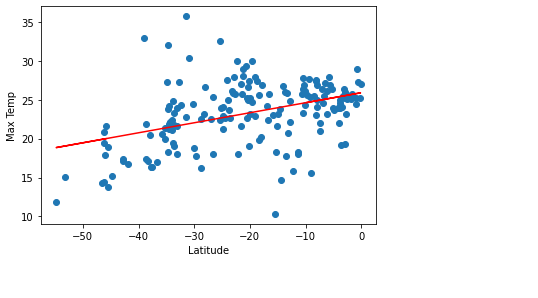

In [30]:
# Linear regression on Southern Hemisphere
s_h_t = linear_regrression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temp")


**Discussion about the linear relationship:** The closer you get to the equator the warmer it is going to be. In the northern hemisphere right now that is very true with the coldest being -40 the furthest away. while in the south the coldest temp is 10. this tempurate diffrence by hemisphere is most likely caused by the fact that it is summer in the south and winter in the north. would like to see if the data flips when the north is in summer and south in winter.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.17648908728779528


Text(0, 0.5, 'Humidity')

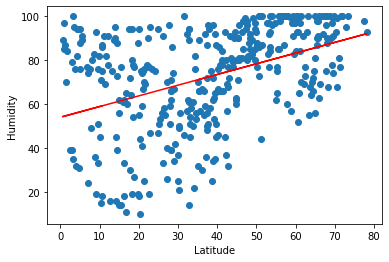

In [31]:
# Northern Hemisphere
n_h_h = linear_regrression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity")

The r-value is: 0.19701172249635274


Text(0, 0.5, 'Humidity')

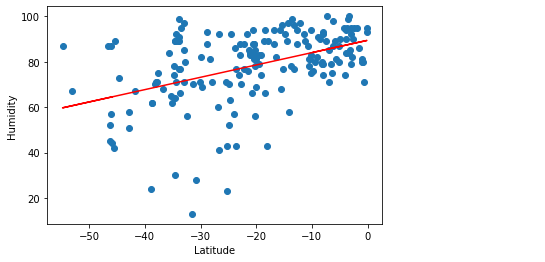

In [32]:
# Southern Hemisphere
s_h_h = linear_regrression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity")

**Discussion about the linear relationship:** north and south appear to by very close on humidity with the r_values only being about .02 off.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.08248787039911966


Text(0, 0.5, 'Cloudiness')

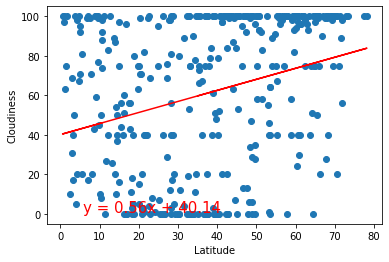

In [33]:
# Northern Hemisphere
n_h_c = linear_regrression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

The r-value is: 0.1669161956125338


Text(0, 0.5, 'Cloudiness')

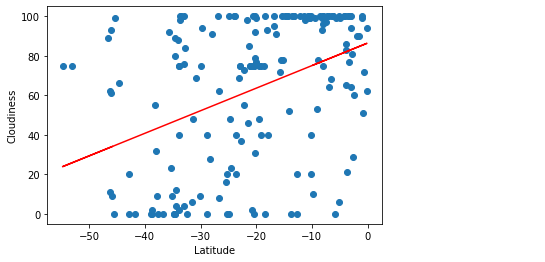

In [34]:
# Southern Hemisphere
s_h_h = linear_regrression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

**Discussion about the linear relationship:** Southern Hemisphere is currently much more cloudy then the Northern Hemisphere with a nearly double r-value.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.007539002550007964


Text(0, 0.5, 'Wind Speed')

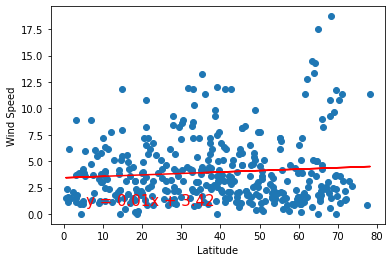

In [35]:
# Northern Hemisphere
n_h_w_s = linear_regrression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

The r-value is: 0.12747665676572506


Text(0, 0.5, 'Wind Speed')

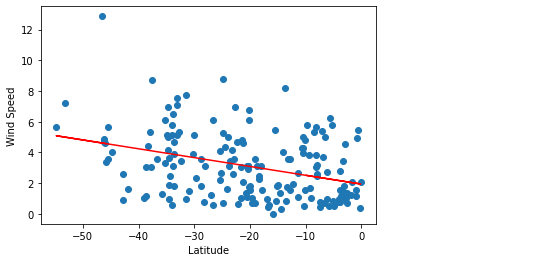

In [36]:
# Southern Hemisphere
s_h_w_s = linear_regrression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

**Discussion about the linear relationship:** Wind speed in the north is the same no matter where on the latitude you are with the slightest change of faster the further north you go. While the south the closer to the equator the slower the wind speeds are.